# Timing plots comparison
This notebook is a documentation of the results of the timing plots.

First we have to specify which Ntuple file to use as an input.

In [1]:
import ROOT, sys
sys.path.append('../python/')
inputFile = ROOT.TFile.Open("/data/hunyadi/CMSSW/PhaseIEfficiencyPlotter_2017_04_02/CMSSW_9_1_0_pre3/src/DPGAnalysis/PhaseIEfficiencyPlotter/histograms_delayscan.root", "READ")

## Validation - Basics and drawing tools
The Ntuple should contain plots listed in different directories. Each of these directories should correspont to a delay scenario. This code prints out the delay scenarios:

In [2]:
for key in ROOT.gDirectory.GetListOfKeys():
    print key.GetTitle()

Delay_-9999.00
Delay_4044.00
Delay_4069.00
Delay_4094.00
Delay_4032.00
Delay_4057.00
Delay_4082.00
Delay_4107.00
Delay_4100.00
Delay_4050.00
Delay_4088.00
Delay_4063.00
Delay_4075.00
Delay_4047.00
Delay_4054.00
Delay_4060.00
Delay_4066.00
Delay_4072.00
Delay_4079.00
Delay_4085.00
Delay_4097.00
Cluster_size_X_vs_delay
Cluster_size_Y_vs_delay
Efficiency_vs_delay


The delay scenarios should have been printed out ("Delay -9999.00" is saved for unknown delay scenarios or simulations). 

First, we define a helper function to make it easy to create the required canvases:

In [3]:
def createTwoByNCanvas(name, title, width, height, plotDirectory, plotNames):
    canvas = ROOT.TCanvas(name, title, width, height)
    canvas.Divide(2, int((len(plotNames) + 1) / 2))
    for index, plotName in enumerate(plotNames):
        canvas.cd(index + 1)
        plot = ROOT.gDirectory.Get(plotDirectory + "/" + plotName)
        if plot: plot.Draw("COLZ")
        else: print "Missing plot: ", plotName
    return canvas

To validate the plots, we will only look at the contents of the first directory. This code draws the cluster and rechit occupancies on the layers and the forward region:

In [4]:
# ROOT.enableJSVis()
ROOT.gStyle.SetPalette(1)

In [5]:
mainDir = ROOT.gDirectory.Get(
    ROOT.gDirectory.GetListOfKeys().First().GetTitle())

The possible plot directories can be listed with this code:

In [6]:
directoryTitleList = []
for directory in mainDir.GetListOfKeys(): 
    directoryTitleList += [directory.GetTitle()]
for index, directoryTitle in enumerate(directoryTitleList):
    sys.stdout.write("%-35s " % directoryTitle)
    if index % 3 == 2: print ""

layersDisksEfficiencyPlots          rechitOccupancyROCPlots             efficiencyROCPlots                  
rechitOccupancyPhiVsZPlots          efficiencyPhiVsZPlots               rechitOccupancyGlyVsGlxPlots        
efficiencyGlyVsGlxPlots             vtxNtrkEfficiencyPreCutsPlots       vtxNtrkEfficiencyWithCutsPlots      
ptEfficiencyPreCutsPlots            ptEfficiencyWithCutsPlots           striphitsEfficiencyPreCutsPlots     
striphitsEfficiencyWithCutsPlots    lxEfficiencyPreCutsPlots            lxEfficiencyWithCutsPlots           
lyEfficiencyPreCutsPlots            lyEfficiencyWithCutsPlots           lyVsLxEfficiencyPreCutsPlots        
lyVsLxEfficiencyWithCutsPlots       clustDistPreCutsPlots               clustDistWithCutsPlots              
hitDistPreCuts                      hitDistWithCutsPlots                d0PreCutsPlots                      
d0WithCutsPlots                     dzPreCutsPlots                      dzWithCutsPlots                     
rocEfficiencyDistri

## Validation - Plots

### Cluster occupancy on the ROCs

Missing plot:  clusterOccupancyROCPlots_Layer1
Missing plot:  clusterOccupancyROCPlots_Layer2
Missing plot:  clusterOccupancyROCPlots_Layer3
Missing plot:  clusterOccupancyROCPlots_Layer4
Missing plot:  clusterOccupancyROCPlots_AllDisks


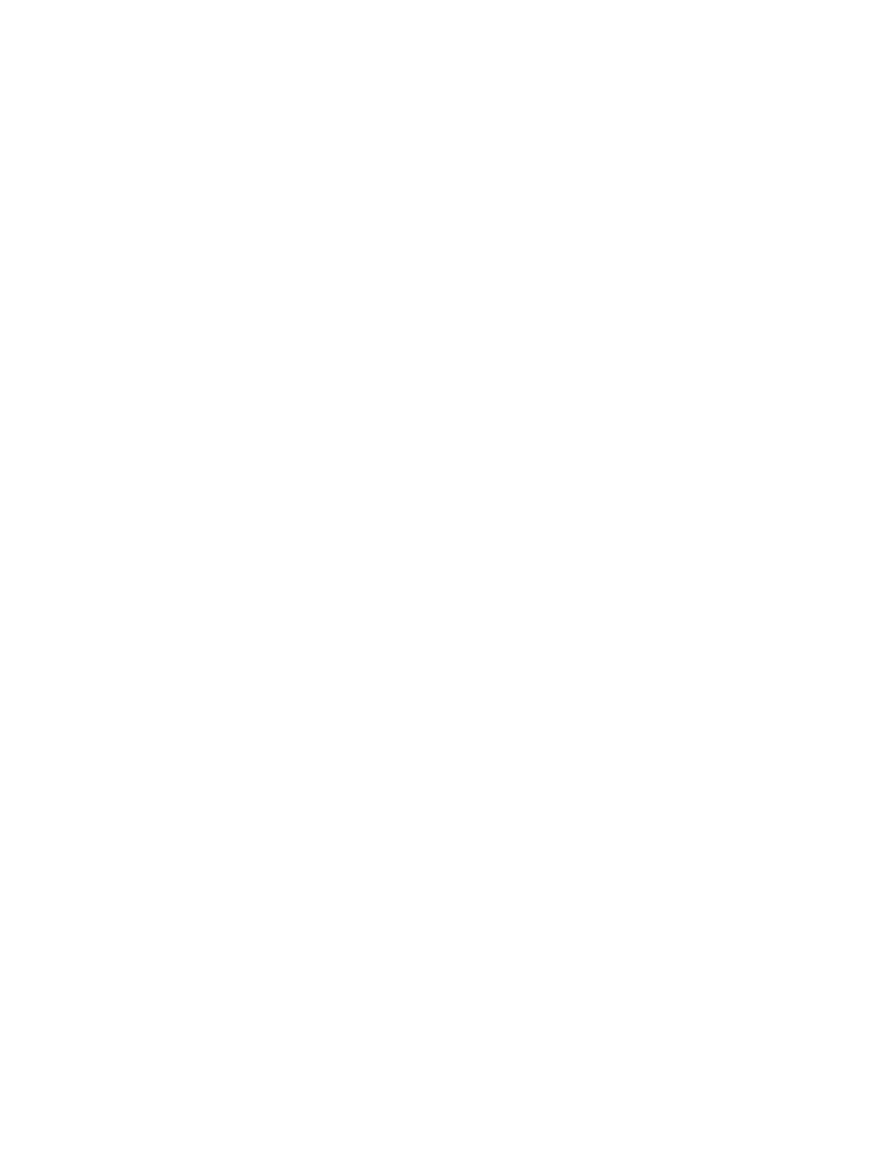

In [7]:
canvas = createTwoByNCanvas("ClusterOccupancyCanvas", "Cluster Occupancy on the ROCs", 900, 1200,
                   mainDir.GetTitle() + "/" + "clusterOccupancyROCPlots",
                   ["clusterOccupancyROCPlots_Layer1",
                    "clusterOccupancyROCPlots_Layer2",
                    "clusterOccupancyROCPlots_Layer3",
                    "clusterOccupancyROCPlots_Layer4",
                    "clusterOccupancyROCPlots_AllDisks"]
                  )
canvas.Draw()

### Cluster occupancy on the layers - phi vs Z

Missing plot:  clusterPhiVsZPlots_Layer1
Missing plot:  clusterPhiVsZPlots_Layer2
Missing plot:  clusterPhiVsZPlots_Layer2
Missing plot:  clusterPhiVsZPlots_Layer4


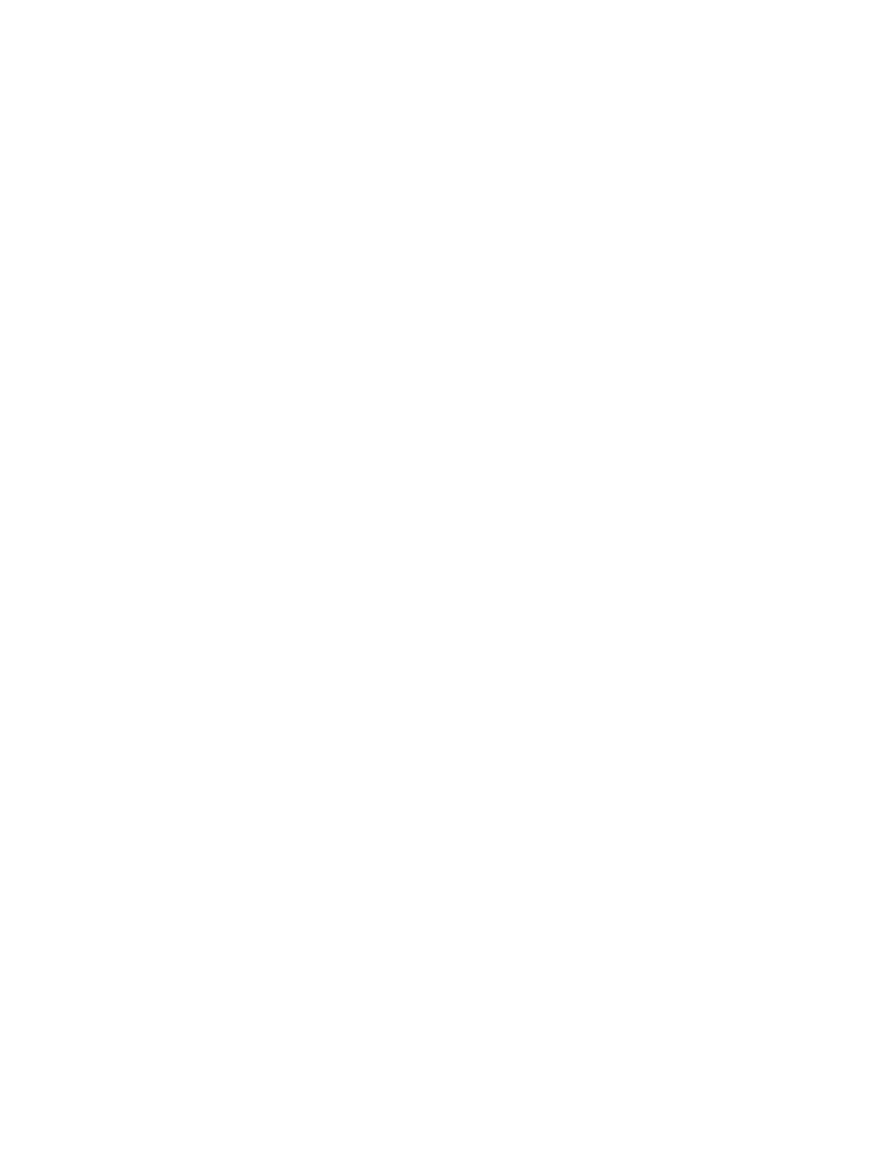

In [8]:
canvas = createTwoByNCanvas("ClusterPhiVsZCanvas", "Cluster occupancy, phi vs Z", 900, 1200,
                   mainDir.GetTitle() + "/" + "clusterPhiVsZPlots",
                   ["clusterPhiVsZPlots_Layer1",
                    "clusterPhiVsZPlots_Layer2",
                    "clusterPhiVsZPlots_Layer2",
                    "clusterPhiVsZPlots_Layer4"]
                  )
canvas.Draw()

### Cluster occupancy on the disks - Y vs X

Missing plot:  clusterGlyVsGlxPlots_Disk1
Missing plot:  clusterGlyVsGlxPlots_Disk2
Missing plot:  clusterGlyVsGlxPlots_Disk3
Missing plot:  clusterGlyVsGlxPlots_Disk4
Missing plot:  clusterGlyVsGlxPlots_Disk5
Missing plot:  clusterGlyVsGlxPlots_Disk6


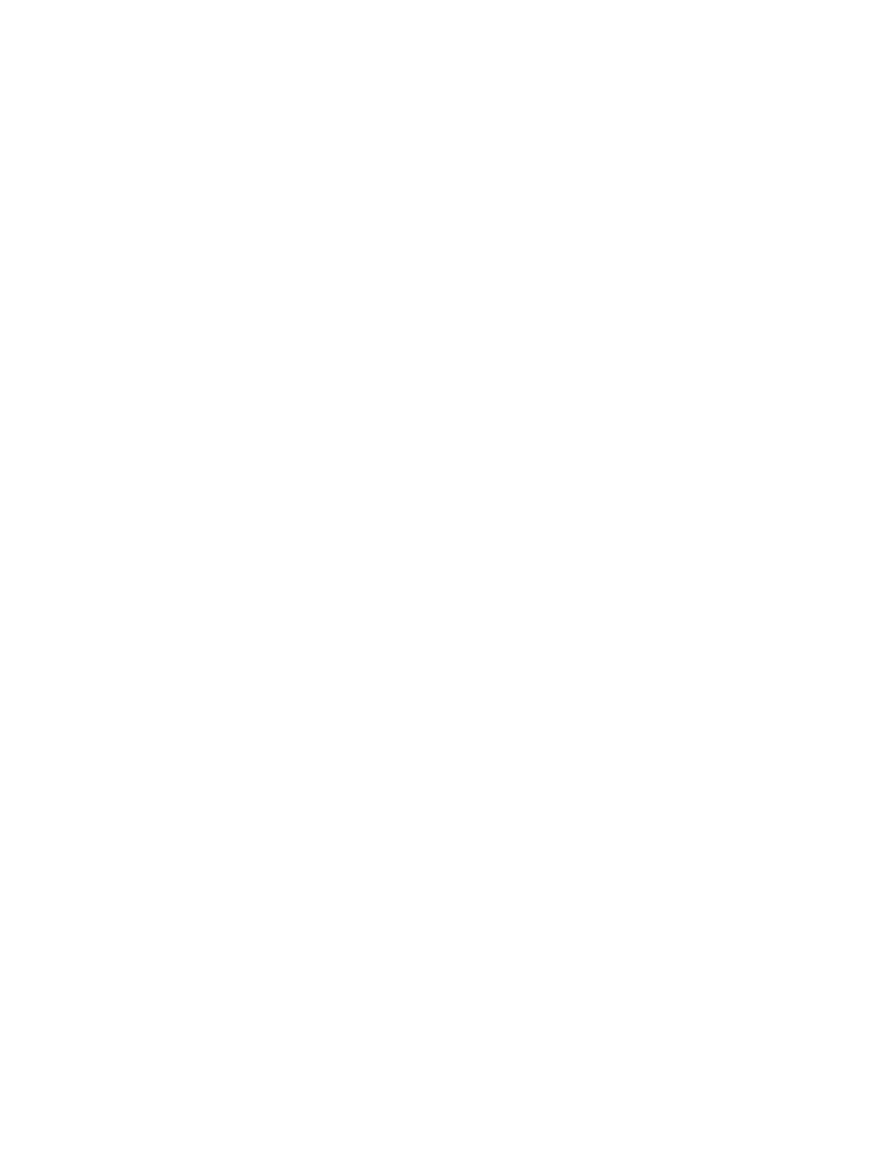

In [9]:
canvas = createTwoByNCanvas("ClusterGlyVsGlxCanvas", "Cluster occupancy, Y vs X", 900, 1200,
                   mainDir.GetTitle() + "/" + "clusterGlyVsGlxPlots",
                   ["clusterGlyVsGlxPlots_Disk1",
                    "clusterGlyVsGlxPlots_Disk2",
                    "clusterGlyVsGlxPlots_Disk3",
                    "clusterGlyVsGlxPlots_Disk4",
                    "clusterGlyVsGlxPlots_Disk5",
                    "clusterGlyVsGlxPlots_Disk6"]
                  )
canvas.Draw()

### Rechit occupancy on the ROCs

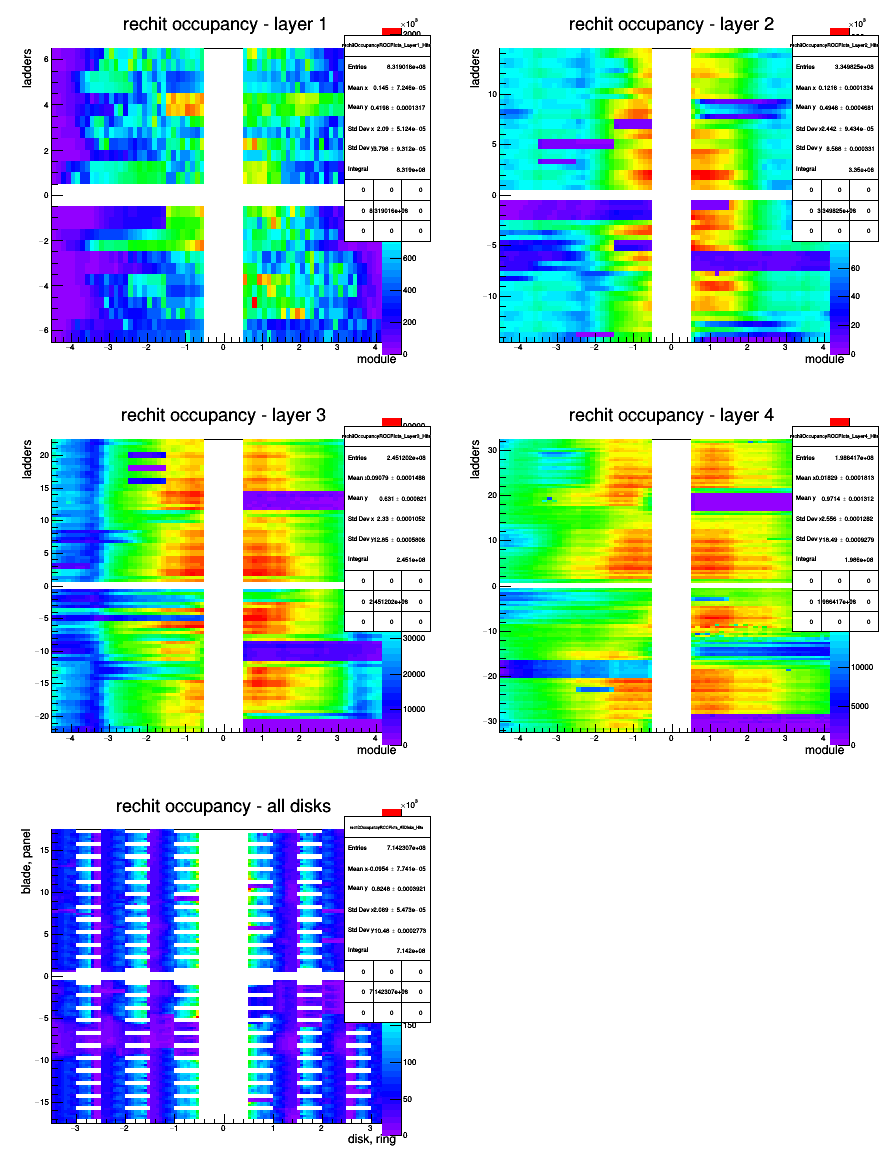

In [10]:
canvas = createTwoByNCanvas("RechitOccupancyCanvas", "Rechit Occupancy on the ROCs", 900, 1200,
                   mainDir.GetTitle() + "/" + "rechitOccupancyROCPlots",
                   ["rechitOccupancyROCPlots_Layer1_Hits",
                    "rechitOccupancyROCPlots_Layer2_Hits",
                    "rechitOccupancyROCPlots_Layer3_Hits",
                    "rechitOccupancyROCPlots_Layer4_Hits",
                    "rechitOccupancyROCPlots_AllDisks_Hits"]
                  )
canvas.Draw()

### Rechit occupancy on the layers - phi vs Z

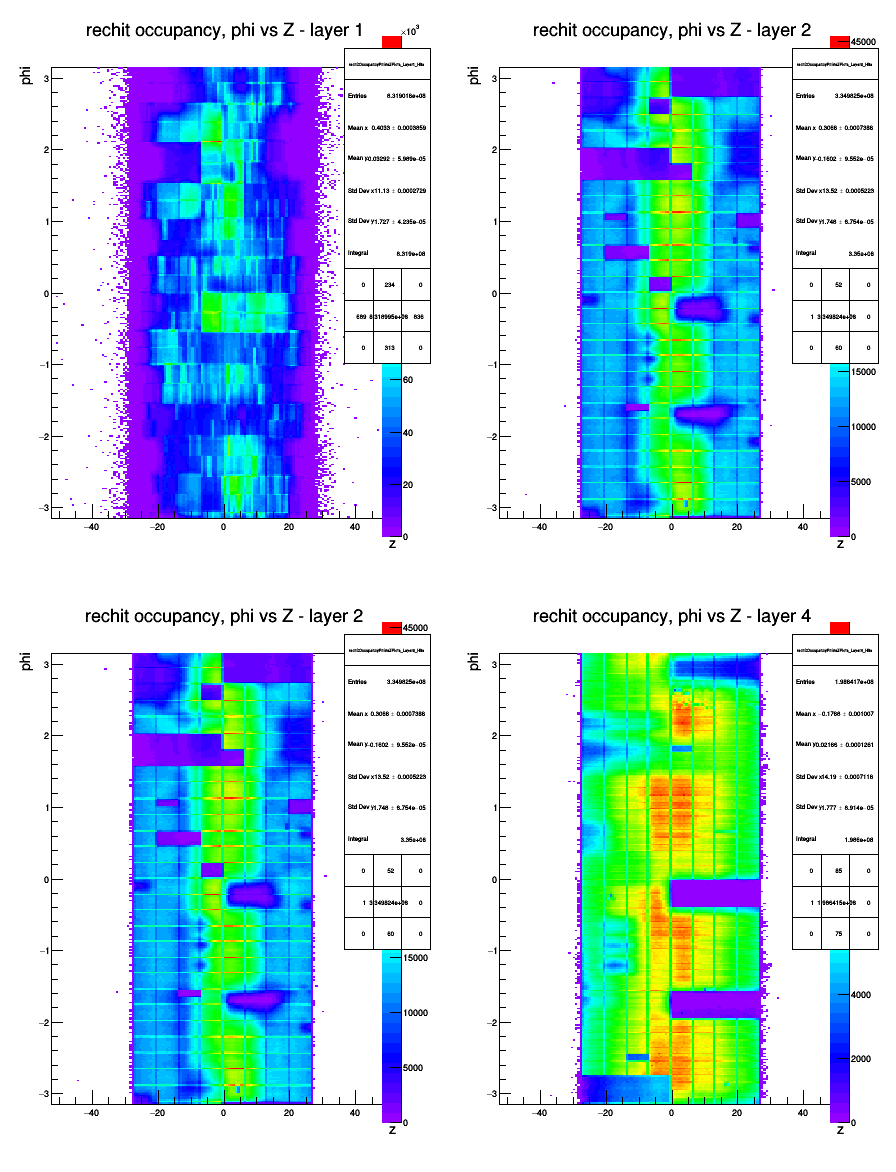

In [11]:
canvas = createTwoByNCanvas("rechitOccupancyPhiVsZCanvas", "Rechit occupancy, phi vs Z", 900, 1200,
                   mainDir.GetTitle() + "/" + "rechitOccupancyPhiVsZPlots",
                   ["rechitOccupancyPhiVsZPlots_Layer1_Hits",
                    "rechitOccupancyPhiVsZPlots_Layer2_Hits",
                    "rechitOccupancyPhiVsZPlots_Layer2_Hits",
                    "rechitOccupancyPhiVsZPlots_Layer4_Hits"]
                  )
canvas.Draw()

### Rechit occupancy on the disks - Y vs X

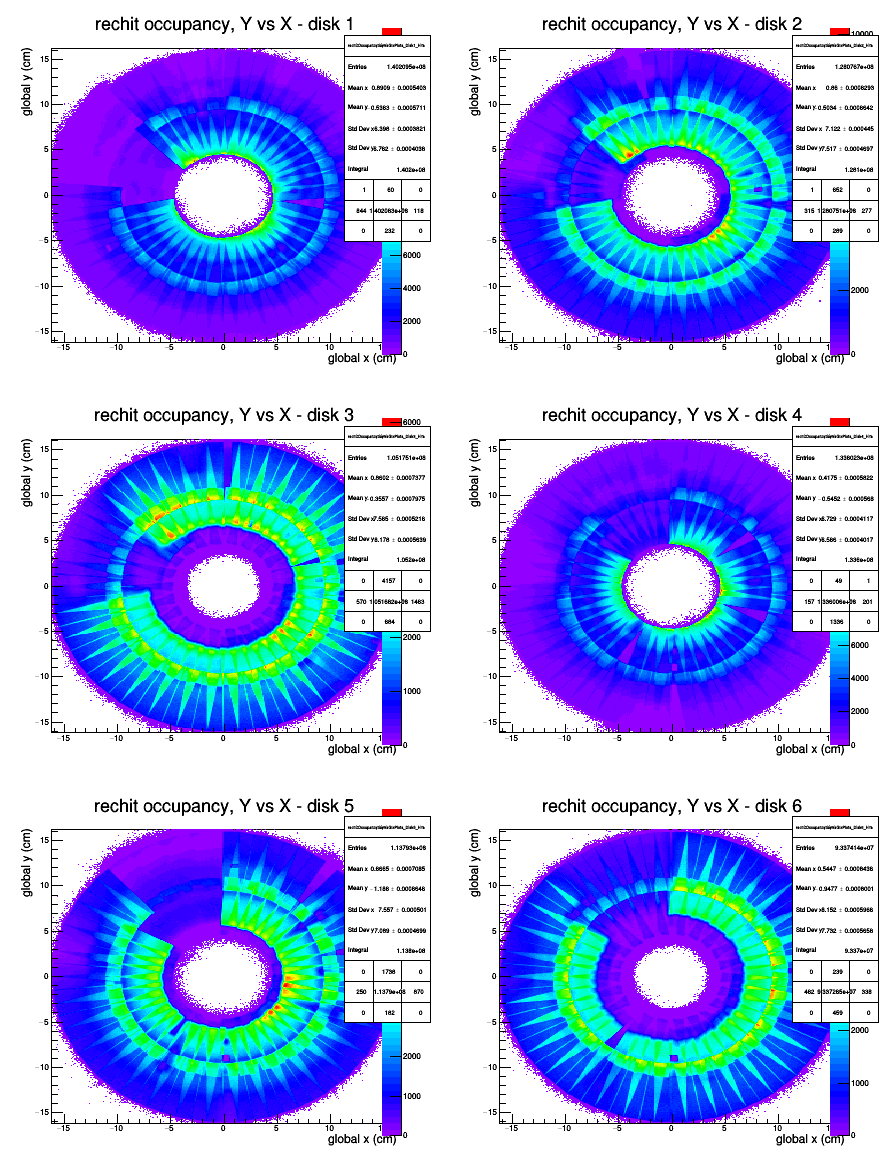

In [12]:
canvas = createTwoByNCanvas("RechitOccupancyGlyVsGlxCanvas", "Rechit occupancy, Y vs X", 900, 1200,
                   mainDir.GetTitle() + "/" + "rechitOccupancyGlyVsGlxPlots",
                   ["rechitOccupancyGlyVsGlxPlots_Disk1_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk2_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk3_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk4_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk5_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk6_Hits"]
                  )
canvas.Draw()